<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/hands-on-computer-vision-with-detectron2/01-detectron2-models/02_instance_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instance Segmentation

Like object detection, instance segmentation also involves object localization and classification. However, instance segmentation takes one step further while localizing the detected objects of interest.

Specifically, besides classification, models for this task localize the detected objects at the pixel level.

Let's develop an instance segmentation application using Detectron2 pre-trained models.

##Setup

In [ ]:
!python -m pip install "git+https://github.com/facebookresearch/detectron2.git"

In [2]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import cv2
from google.colab.patches import cv2_imshow

# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
print(detectron2.__version__)

0.6


##Pre-trained model

In [4]:
# Select a model
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
score_thresh_test = 0.95

# Create a configuration file
config = get_cfg()
config_file = model_zoo.get_config_file(config_file_path)
config.merge_from_file(config_file)

# Download weights
config.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(config)

model_final_2d9806.pkl: 431MB [00:03, 142MB/s]                           


##Performing inferences

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

In [6]:
img = cv2.imread("input.jpg")
output = predictor(img)
print(output)

{'instances': Instances(num_instances=4, image_height=720, image_width=960, fields=[pred_boxes: Boxes(tensor([[298.0179, 194.8398, 438.7511, 653.0747],
        [489.3329, 335.9763, 687.1323, 641.1672],
        [419.5230, 250.9283, 500.0357, 629.5453],
        [451.5580, 395.0862, 557.6307, 665.5721]], device='cuda:0')), scores: tensor([0.9985, 0.9957, 0.9941, 0.9934], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],

##Visualizing the results

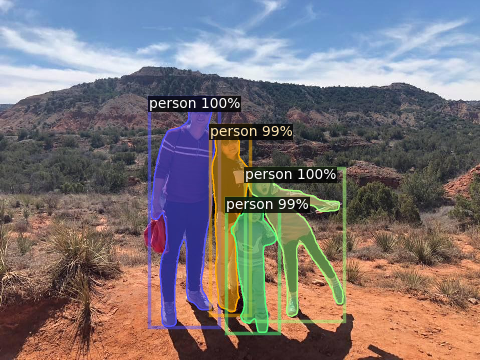

In [7]:
metadata = MetadataCatalog.get(config.DATASETS.TRAIN[0])

visualizer = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = visualizer.draw_instance_predictions(instances)  # annotate the predicted instances to the image
cv2_imshow(annotated_img.get_image()[:, :, ::-1])

In [8]:
img = cv2.imread("img2.jpeg")
output = predictor(img)
print(output)

{'instances': Instances(num_instances=1, image_height=864, image_width=1152, fields=[pred_boxes: Boxes(tensor([[328.7243, 103.1670, 826.3210, 855.4152]], device='cuda:0')), scores: tensor([0.9996], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')])}


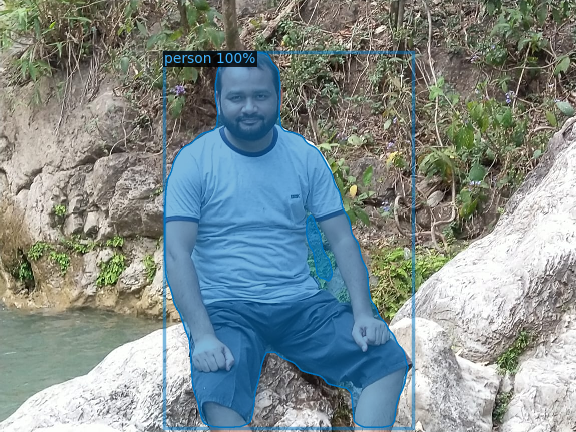

In [9]:
metadata = MetadataCatalog.get(config.DATASETS.TRAIN[0])

visualizer = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = visualizer.draw_instance_predictions(instances)
cv2_imshow(annotated_img.get_image()[:, :, ::-1])